About Dataset

This dataset contains information on the relationship between work experience (in months) and corresponding monthly salaries (in thousand dollars) of employees across various industries. It is designed to help data enthusiasts and aspiring data scientists practice linear regression techniques by analyzing and modeling salary predictions based on experience.

https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Experience-Salary.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [5]:
df.loc[df['salary(in thousands)']<0]

,exp(in months),salary(in thousands)
133,8.520651,-1.276342
772,2.882022,-0.074563


In [6]:
df.loc[133].at['salary(in thousands)']

-1.2763422707877368

In [7]:
df.loc[133].at['exp(in months)']

8.520650916820959

In [8]:
df.loc[133].at['salary(in thousands)'] = abs(df.loc[133].at['salary(in thousands)'])

In [9]:
df.loc[772].at['salary(in thousands)'] = abs(df.loc[772].at['salary(in thousands)'])

In [10]:
df.loc[df['salary(in thousands)']<0]

,exp(in months),salary(in thousands)


In [11]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [12]:
df = df.rename(columns={'salary(in thousands)' : 'salary', 'exp(in months)': 'exp'})

# SHORT EDA

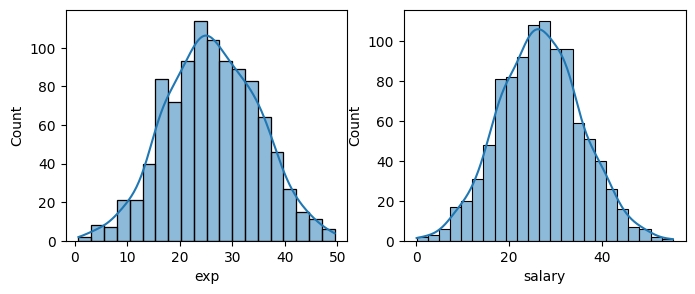

In [13]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sns.histplot(data=df, x='exp', kde = True, ax=ax[0],)
sns.histplot(data=df, x = 'salary', kde = True, ax=ax[1])
plt.show()

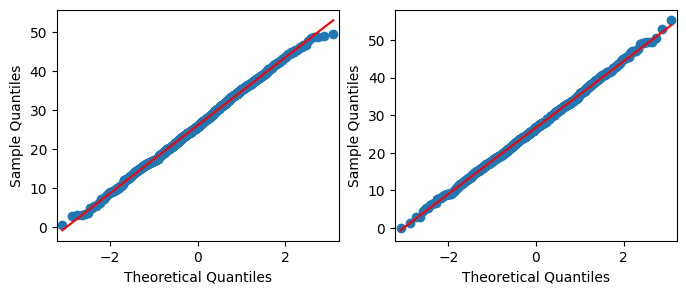

In [14]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sm.qqplot(df['exp'], line='s', ax=ax[0])
sm.qqplot(df['salary'], line='s', ax=ax[1])
plt.show()

Data are quite normally distributed, no need to optimize the data e.g. with normalization, logarithm function, x^2, etc. or any other transformation to get normal distribution. 

In [15]:
Y = df['salary']
X = df['exp']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

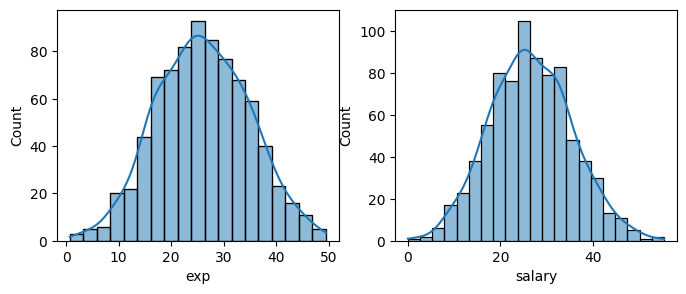

In [17]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sns.histplot(x=X_train, kde = True, ax=ax[0])
sns.histplot(x=Y_train, kde=True, ax=ax[1])
plt.show()

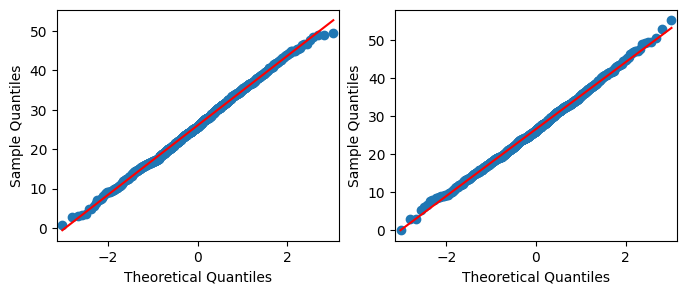

In [18]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sm.qqplot(X_train, line='s', ax=ax[0])
sm.qqplot(Y_train, line='s', ax=ax[1])
plt.show()

# Linear Regression

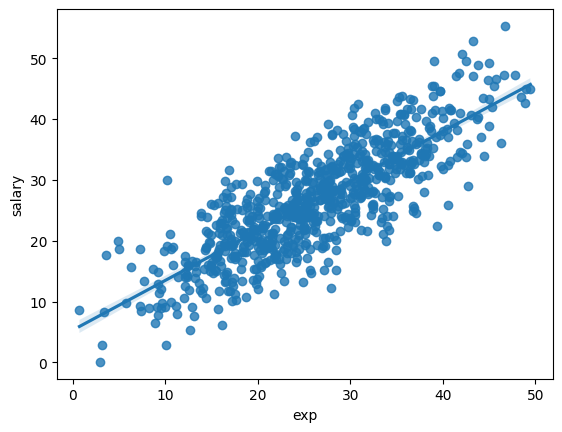

In [19]:
sns.regplot(x=X_train, y=Y_train)
plt.show()

In [20]:
model = sm.OLS(Y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1572.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          8.67e-191
Time:                        22:03:19   Log-Likelihood:                -2441.1
No. Observations:                 800   AIC:                             4886.
Df Residuals:                     798   BIC:                             4896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3292      0.566      9.408      0.0

In order to check the magnitude of outliers I artificially add an outlier to X_train and Y_train data. As there were 1000 data, safe was is to put the outliers with with index '1000'.

In [21]:
X_train.sort_index()

0      18.290293
1      17.023407
2      26.343613
4      27.742516
5      31.671171
         ...    
995    22.161741
996    32.266497
997    17.039030
998    25.222124
999    16.418028
Name: exp, Length: 800, dtype: float64

In [22]:
X_train_2 = X_train.copy()
X_train_2[1000] = 50

In [23]:
X_train

40     28.500950
977    19.798253
829    19.980263
973    24.677967
874    45.008264
         ...    
400    26.143057
118    30.782607
701    37.947709
206    30.462459
867    32.346480
Name: exp, Length: 800, dtype: float64

In [24]:
X_train_2

40      28.500950
977     19.798253
829     19.980263
973     24.677967
874     45.008264
          ...    
118     30.782607
701     37.947709
206     30.462459
867     32.346480
1000    50.000000
Name: exp, Length: 801, dtype: float64

In [25]:
Y_train.sort_index()

0      16.521825
1      11.666234
2      23.167255
4      23.166236
5      32.966251
         ...    
995    24.666502
996    24.160270
997    19.903797
998    21.974413
999    19.634787
Name: salary, Length: 800, dtype: float64

In [26]:
Y_train_2 = Y_train.copy()
Y_train_2[1000] = 10

In [27]:
Y_train_2

40      25.146716
977     12.889201
829     24.256672
973     23.906179
874     49.163340
          ...    
118     42.523807
701     27.959760
206     25.348982
867     32.242909
1000    10.000000
Name: salary, Length: 801, dtype: float64

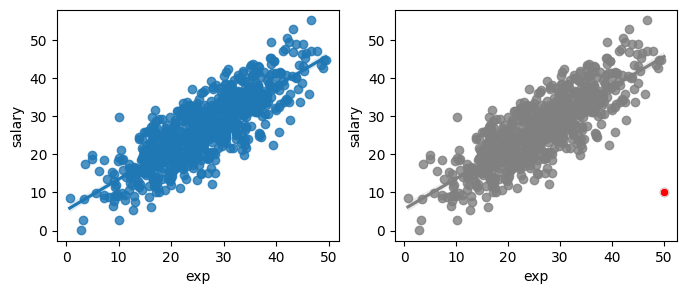

In [28]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sns.regplot(x=X_train, y=Y_train, ax=ax[0])
sns.regplot(x=X_train_2, y=Y_train_2, ax=ax[1], color='gray')
sns.scatterplot(x=[X_train_2[1000]], y=[Y_train_2[1000]], color='red', ax=ax[1])
plt.show()

In [29]:
model_2 = sm.OLS(Y_train_2, sm.add_constant(X_train_2))
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1446.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.10e-181
Time:                        22:03:24   Log-Likelihood:                -2467.6
No. Observations:                 801   AIC:                             4939.
Df Residuals:                     799   BIC:                             4949.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6444      0.581      9.707      0.0

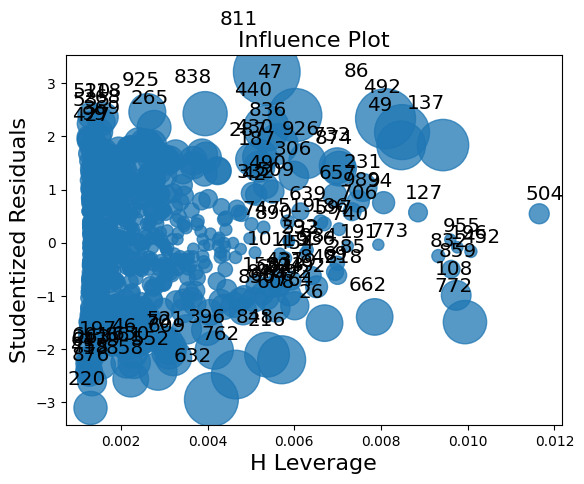

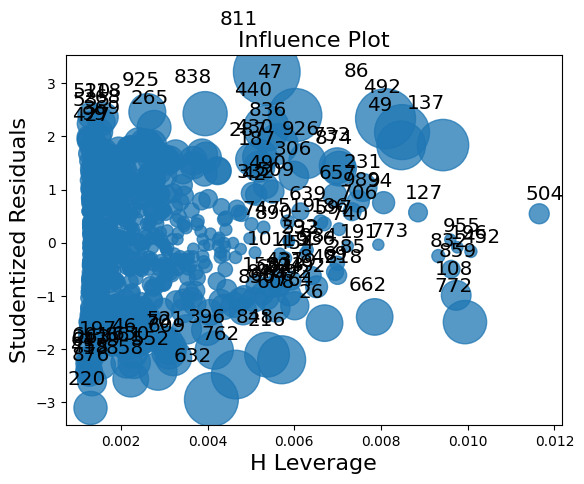

In [30]:
sm.graphics.influence_plot(results, criterion="cooks") 

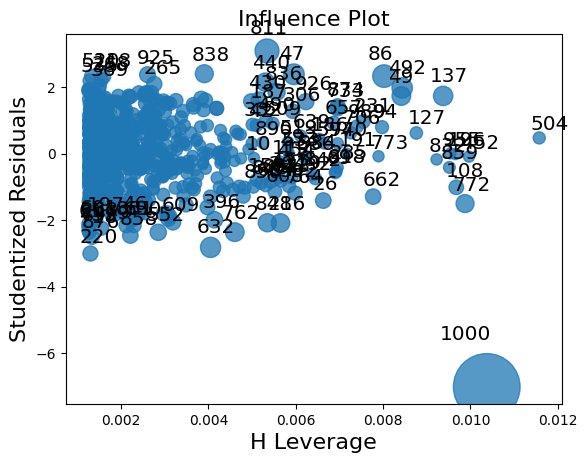

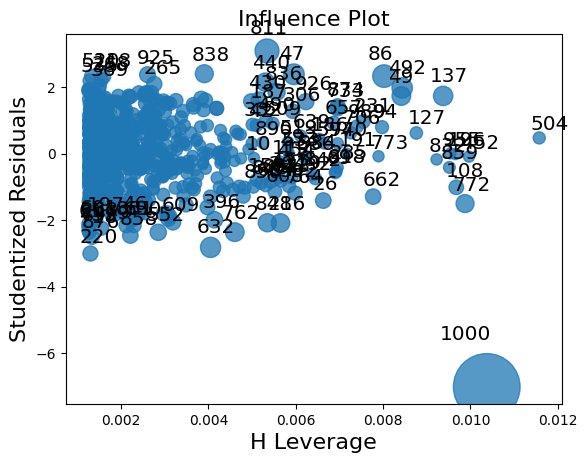

In [31]:
sm.graphics.influence_plot(results_2, criterion="cooks") 

In [32]:
influence_1 = results.get_influence()
pd.Series(influence_1.hat_matrix_diag).describe()

count    800.000000
mean       0.002500
std        0.001625
min        0.001250
25%        0.001385
50%        0.001885
75%        0.002923
max        0.011648
dtype: float64

In [33]:
influence_2 = results_2.get_influence()
pd.Series(influence_2.hat_matrix_diag).describe()

count    801.000000
mean       0.002497
std        0.001633
min        0.001248
25%        0.001381
50%        0.001879
75%        0.002914
max        0.011576
dtype: float64

In [34]:
influence_1.summary_frame().sort_values("cooks_d", key=abs, ascending=False).head(10)

,dfb_const,dfb_exp,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
811,0.232339,-0.206758,0.027545,3.195826,0.005365,0.234713,3.214460,0.236081
86,-0.157359,0.194037,0.022135,2.327683,0.008104,0.210403,2.334162,0.210989
492,0.192150,-0.177849,0.018470,2.077710,0.008485,0.192200,2.082047,0.192602
632,0.115803,-0.157484,0.017691,-2.935783,0.004088,-0.188100,-2.949917,-0.189006
47,-0.130365,0.166321,0.017353,2.394099,0.006019,0.186297,2.401238,0.186852
137,0.179125,-0.167016,0.016031,1.835201,0.009430,0.179058,1.837933,0.179324
49,0.168868,-0.156274,0.014284,1.829200,0.008466,0.169021,1.831898,0.169270
762,0.109213,-0.144920,0.014271,-2.472085,0.004649,-0.168943,-2.480050,-0.169488
216,0.114742,-0.147445,0.013851,-2.196704,0.005708,-0.166440,-2.201995,-0.166841
440,-0.106937,0.138675,0.012484,2.153011,0.005358,0.158015,2.157938,0.158376


In [35]:
influence_2.summary_frame().sort_values("cooks_d", key=abs, ascending=False).head(10)

,dfb_const,dfb_exp,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1000,0.558177,-0.673578,0.243216,-6.812068,0.010374,-0.697447,-7.014546,-0.718178
811,0.222589,-0.197985,0.025307,3.070152,0.005341,0.224977,3.086490,0.226175
86,-0.155827,0.192472,0.021816,2.323030,0.008021,0.208885,2.329455,0.209463
47,-0.128421,0.164183,0.016952,2.378516,0.005957,0.184130,2.385488,0.184669
492,0.181677,-0.168093,0.016521,1.970576,0.008437,0.181775,1.974145,0.182105
632,0.109623,-0.149514,0.016022,-2.807734,0.004048,-0.179007,-2.819923,-0.179784
137,0.168469,-0.157026,0.014187,1.731520,0.009375,0.168446,1.733692,0.168657
762,0.103007,-0.137038,0.012812,-2.354132,0.004602,-0.160073,-2.360861,-0.160530
49,0.159160,-0.147236,0.012695,1.729318,0.008418,0.159341,1.731479,0.159540
216,0.107743,-0.138751,0.012305,-2.081139,0.005650,-0.156874,-2.085496,-0.157202


In [36]:
cooks_1 = influence_1.cooks_distance
cooks_1_mean = cooks_1[0].mean()
cooks_1_mean_list = [4*cooks_1_mean for i in X_train.index]
influential_points_1 = X_train.index[cooks_1[0] > (4*cooks_1_mean)]

In [37]:
influential_points_1

Int64Index([874, 521, 143, 492,  49,  26, 733, 187, 396, 440, 242, 650, 858,
            662, 552,  47, 848, 926, 811, 762, 137, 772, 287, 836, 430, 609,
            861,  70, 220, 838, 632, 216, 459, 265, 925,  86],
           dtype='int64')

In [38]:
X_train.index

Int64Index([ 40, 977, 829, 973, 874, 475, 839, 665, 199, 196,
            ...
            958, 743, 740,   8,  73, 400, 118, 701, 206, 867],
           dtype='int64', length=800)

In [39]:
influential_points_1.shape

(36,)

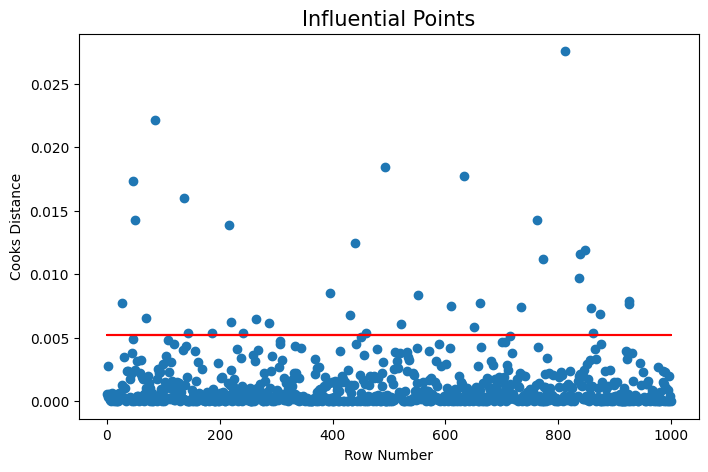

In [40]:
plt.figure(figsize = (8, 5))
plt.scatter(X_train.index, cooks_1[0])
plt.plot(X_train.index, cooks_1_mean_list, color='red')
plt.xlabel('Row Number', fontsize = 10)
plt.ylabel('Cooks Distance', fontsize = 10)
plt.title('Influential Points', fontsize = 15)
plt.show()

In [41]:
cooks_2 = influence_2.cooks_distance
cooks_2_mean = cooks_2[0].mean()
cooks_2_mean_list = [4*cooks_2_mean for i in X_train_2.index]
influential_points_2 = X_train_2.index[cooks_2[0] > (4*cooks_2_mean)]

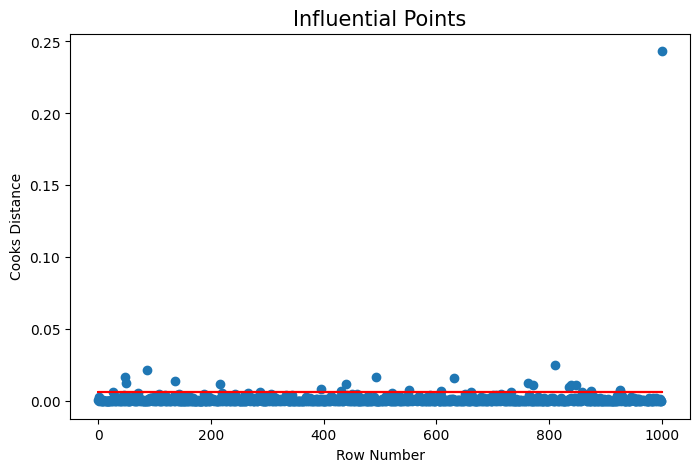

In [42]:
plt.figure(figsize = (8, 5))
plt.scatter(X_train_2.index, cooks_2[0])
plt.plot(X_train_2.index, cooks_2_mean_list, color='red')
plt.xlabel('Row Number', fontsize = 10)
plt.ylabel('Cooks Distance', fontsize = 10)
plt.title('Influential Points', fontsize = 15)
plt.show()

In [43]:
influential_points_1.shape

(36,)

In [44]:
influential_points_2.shape

(27,)

In [45]:
influential_points_1_list = df.loc[influential_points_1,:]

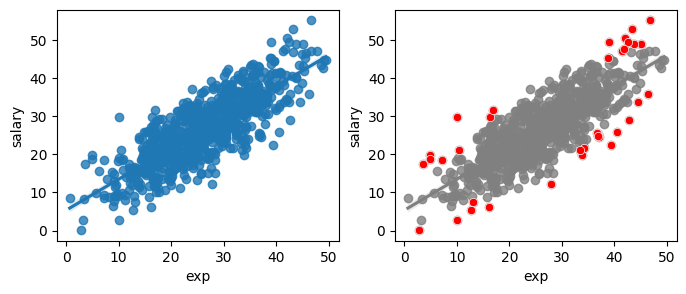

In [46]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sns.regplot(x=X_train, y=Y_train, ax=ax[0])
sns.regplot(x=X_train, y=Y_train, ax=ax[1], color = 'gray')
sns.scatterplot(x=influential_points_1_list['exp'],y = influential_points_1_list['salary'], color='red', ax=ax[1])
plt.show()

In [47]:
X_train_2_df = X_train_2.to_frame()

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df_2 = df.copy()
row = pd.Series({'exp' : 50, 'salary' : 10}, name=1000)
df_2 = df.append(row)

In [50]:
influential_points_2_list = df_2.loc[influential_points_2,:]

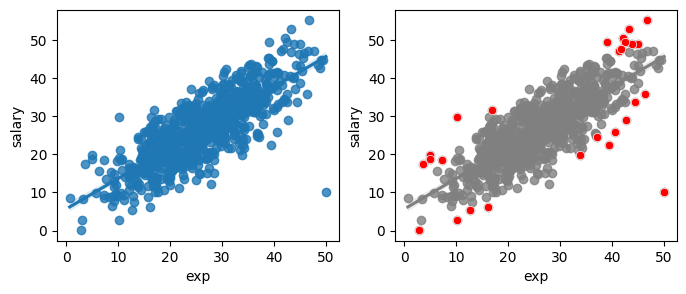

In [51]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
sns.regplot(x=X_train_2, y=Y_train_2, ax=ax[0])
sns.regplot(x=X_train_2, y=Y_train_2, ax=ax[1], color='gray')
sns.scatterplot(x=influential_points_2_list['exp'],y = influential_points_2_list['salary'], color='red', ax=ax[1])
plt.show()